# Graph Neural Network Project (** Difficulty)

**Overview**

This project is designed to explore Graph Neural Networks (GNNs), a specialized type of neural network that directly operates on graph structures. The focus will be on understanding graph theory fundamentals, GNN mechanics, graph convolutions, and graph pooling. The project will involve applying a GNN to the ZINC dataset using PyTorch Geometric, with an optional task of implementing a graph transformer from scratch.

**Objectives**

* Understanding Graph Theory and GNNs:
* Explain the concept of a graph in mathematical terms, including nodes and edges.
* Introduce Graph Neural Networks, detailing how they differ from traditional neural networks and their specific applications.

**Graph Convolution and Pooling:**

* Explain graph convolution how it extends the idea of convolution from images to graphs.
* Detail graph pooling and its role in reducing graph size while maintaining essential features.

**PyTorch Geometric Implementation:**
* Utilize PyTorch Geometric to create and train a GNN on the ZINC dataset.
* Focus on designing network architectures suitable for chemical compound property prediction, which is the primary application of the ZINC dataset.

**Performance Evaluation:**
* Evaluate the GNN model based on its predictive accuracy.

**Advanced Exploration (Optional):**
* Implement a graph transformer model from scratch, as described in the provided research paper.
* Compare its performance and characteristics with the standard GNN model.

**Expected Deliverables**

*Code Implementations:*

* Python code for the GNN model using PyTorch Geometric and the ZINC dataset.
* Optional implementation of a graph transformer model.

Technical Reports:
* A detailed explanation of graph theory, GNNs, graph convolution, and pooling.
* Reports on model performance, including accuracy and computational efficiency.

*Documentation:*

* README.md: A summary document outlining the project’s objectives, methods, and key results.
* A comprehensive report detailing the theoretical background, practical implementation, and analysis of the results.

*Resources and References*

* Graph Transformer Paper: https://proceedings.neurips.cc/paper_files/paper/2019/file/9d63484abb477c97640154d40595a3bb-Paper.pdf
* ZINC Dataset Documentation: https://pytorch-geometric.readthedocs.io/en/latest/generated/torch_geometric.datasets.ZINC.html
* PyTorch Geometric GitHub: https://github.com/pyg-team/pytorch_geometric
* Tutorial on GNNs: https://www.datacamp.com/tutorial/comprehensive-introduction-graph-neural-networks-gnns-tutorial
* Review on Graph Neural Networks: https://arxiv.org/pdf/1812.08434.pdf



## Graph Theory

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

### Basic Operations on Graphs

In [4]:
G = nx.Graph()

G.add_nodes_from(range(5))

G.add_edges_from([
    (0,1), (0,2), (0,3), (3,4)
])

print("Nodes in G:", G.nodes())
print("Edges in G:", G.edges())

Nodes in G: [0, 1, 2, 3, 4]
Edges in G: [(0, 1), (0, 2), (0, 3), (3, 4)]


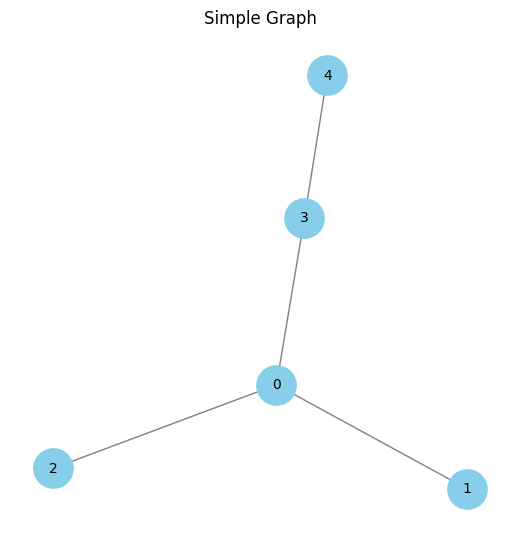

In [5]:
plt.figure(figsize=(5, 5))
pos = nx.spring_layout(G, seed=42)  # spring layout with a fixed seed
nx.draw(
    G, pos, with_labels=True,
    node_color='skyblue', edge_color='gray',
    node_size=800, font_size=10
)
plt.title("Simple Graph")
plt.show()


In [6]:
# Degree of each node: number of edges connected to it
degree_dict = dict(G.degree())
print("Degree of each node:", degree_dict)

# Number of nodes and edges
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

# Check if the graph is connected (for an undirected graph)
is_connected = nx.is_connected(G)
print("Is the graph connected?", is_connected)

Degree of each node: {0: 3, 1: 1, 2: 1, 3: 2, 4: 1}
Number of nodes: 5
Number of edges: 4
Is the graph connected? True


In [7]:
#  Shortest Path and Distances
start_node = 1
end_node = 4

path_1_to_4 = nx.shortest_path(G, source=start_node, target=end_node)
path_length_1_to_4 = nx.shortest_path_length(G, source=start_node, target=end_node)

print(f"Shortest path from {start_node} to {end_node}: {path_1_to_4}")
print(f"Path length from {start_node} to {end_node}: {path_length_1_to_4}")

Shortest path from 1 to 4: [1, 0, 3, 4]
Path length from 1 to 4: 3


In [8]:
# connected components
components = list(nx.connected_components(G))
print("Connected components:", components)

Connected components: [{0, 1, 2, 3, 4}]


After adding node 5 and edge (5,2)
Nodes: [0, 1, 2, 3, 4, 5]
Edges: [(0, 1), (0, 2), (0, 3), (2, 5), (3, 4)]


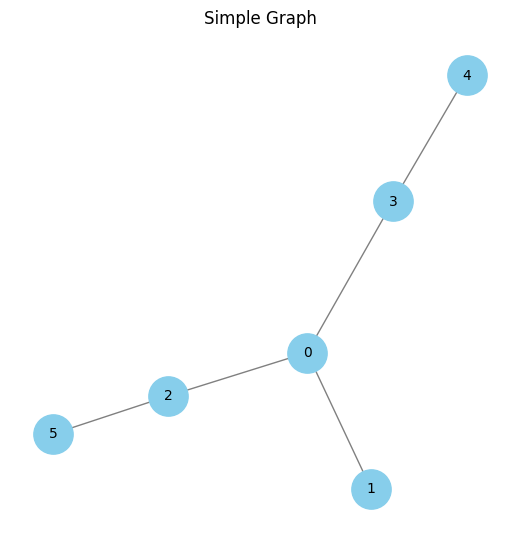

In [9]:
# adding and removing nodes and edges

G.add_node(5)
G.add_edge(5, 2)

print("After adding node 5 and edge (5,2)")
print("Nodes:", G.nodes())
print("Edges:", G.edges())

plt.figure(figsize=(5, 5))
pos = nx.spring_layout(G, seed=42)  # spring layout with a fixed seed
nx.draw(
    G, pos, with_labels=True,
    node_color='skyblue', edge_color='gray',
    node_size=800, font_size=10
)
plt.title("Simple Graph")
plt.show()


In [10]:
# Converting to an Adjacency Matrix or Edge List
A = nx.to_numpy_array(G)
print("Adjacency matrix (NumPy array):\n", A)

# Edge list
edge_list = nx.to_edgelist(G)
print("Edge list:", list(edge_list))

Adjacency matrix (NumPy array):
 [[0. 1. 1. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
Edge list: [(0, 1, {}), (0, 2, {}), (0, 3, {}), (2, 5, {}), (3, 4, {})]


###  Different Types of Graphs

/var/folders/p5/dn4spxsx2897rzdgf07vym2c0000gn/T/ipykernel_60927/3100503840.py:12: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


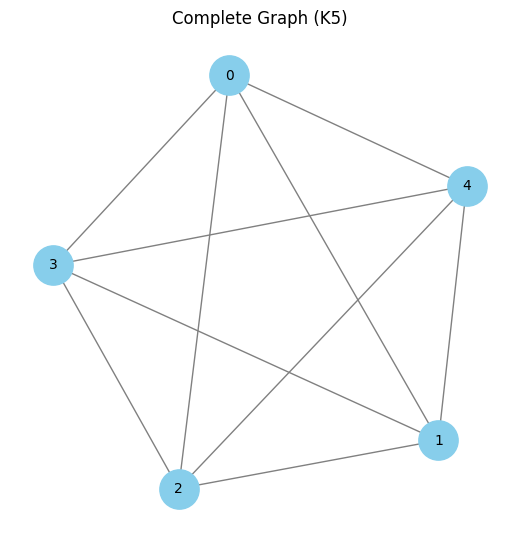

Saved complete_graph_k5.pdf


In [11]:
# Create a complete graph K5 (5 nodes, every node connected to every other)
K5 = nx.complete_graph(5)

plt.figure(figsize=(5, 5))
pos = nx.spring_layout(K5, seed=42)  # spring layout with a fixed seed
nx.draw(
    K5, pos, with_labels=True,
    node_color='skyblue', edge_color='gray',
    node_size=800, font_size=10
)
plt.title("Complete Graph (K5)")
plt.tight_layout()
plt.savefig("../images/complete_graph_k5.pdf", format="pdf")
plt.show()
plt.close()

print("Saved complete_graph_k5.pdf")

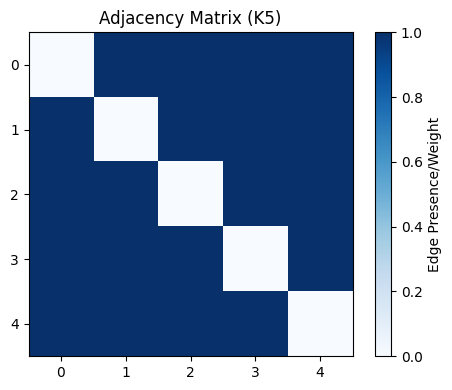

Saved complete_graph_k5_adj.pdf


In [12]:
# 3. Adjacency Matrix Visualization
A = nx.to_numpy_array(K5)
plt.figure(figsize=(5, 4))
plt.imshow(A, cmap="Blues", interpolation="nearest")
plt.colorbar(label='Edge Presence/Weight')
plt.title("Adjacency Matrix (K5)")
plt.tight_layout()
plt.savefig("../images/complete_graph_k5_adj.pdf", format="pdf")
plt.show()
plt.close()

print("Saved complete_graph_k5_adj.pdf")

/var/folders/p5/dn4spxsx2897rzdgf07vym2c0000gn/T/ipykernel_60927/715027791.py:11: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


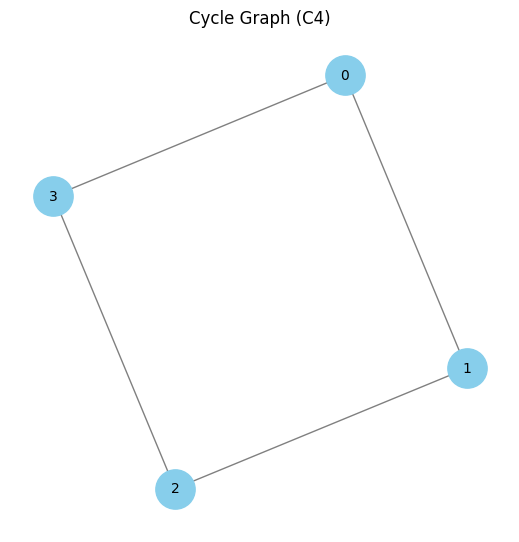

Saved cycle_graph_example.pdf


In [13]:
C4 = nx.cycle_graph(4)

plt.figure(figsize=(5, 5))
pos = nx.spring_layout(C4, seed=42)
nx.draw(
    C4, pos, with_labels=True,
    node_color='skyblue', edge_color='gray',
    node_size=800, font_size=10
)
plt.title("Cycle Graph (C4)")
plt.tight_layout()
plt.savefig("../images/cycle_graph_example.pdf", format="pdf")
plt.show()
plt.close()

print("Saved cycle_graph_example.pdf")

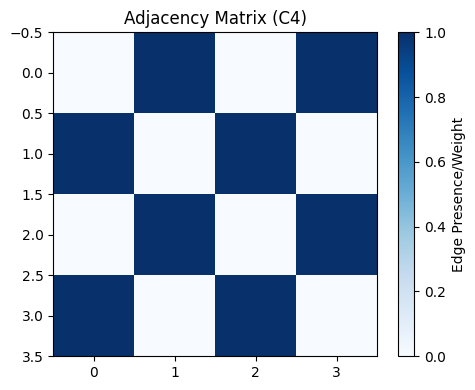

Saved cycle_graph_example_adj.pdf


In [14]:
A = nx.to_numpy_array(C4)
plt.figure(figsize=(5, 4))
plt.imshow(A, cmap="Blues", interpolation="nearest")
plt.colorbar(label='Edge Presence/Weight')
plt.title("Adjacency Matrix (C4)")
plt.tight_layout()
plt.savefig("../images/cycle_graph_example_adj.pdf", format="pdf")
plt.show()
plt.close()

print("Saved cycle_graph_example_adj.pdf")

/var/folders/p5/dn4spxsx2897rzdgf07vym2c0000gn/T/ipykernel_60927/3937902028.py:15: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


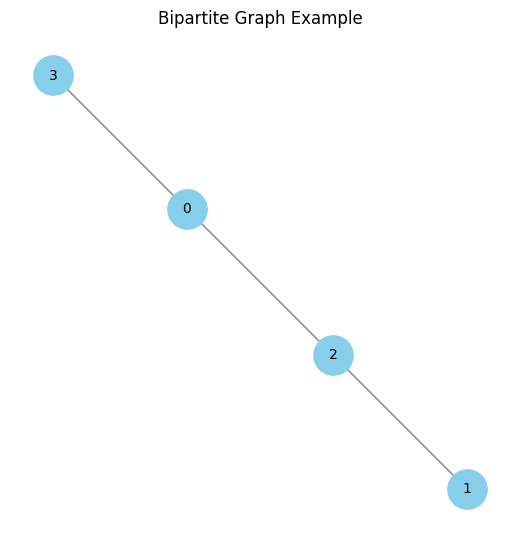

Saved bipartite_graph_example.pdf


In [15]:
B = nx.Graph()
B.add_nodes_from([0,1], bipartite=0)
B.add_nodes_from([2,3], bipartite=1)
# Add edges between sets
B.add_edges_from([(0,2), (0,3), (1,2)])

plt.figure(figsize=(5, 5))
pos = nx.spring_layout(B, seed=42)  # can still use spring_layout
nx.draw(
    B, pos, with_labels=True,
    node_color='skyblue', edge_color='gray',
    node_size=800, font_size=10
)
plt.title("Bipartite Graph Example")
plt.tight_layout()
plt.savefig("../images/bipartite_graph_example.pdf", format="pdf")
plt.show()
plt.close()

print("Saved bipartite_graph_example.pdf")

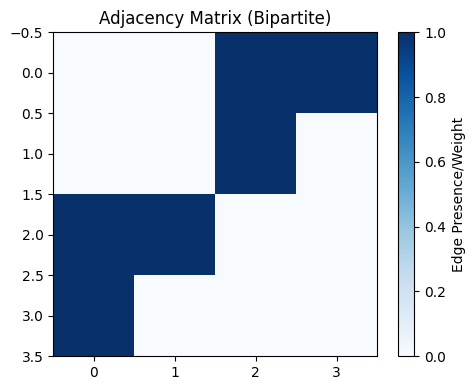

Saved bipartite_graph_example_adj.pdf


In [16]:
A = nx.to_numpy_array(B)
plt.figure(figsize=(5, 4))
plt.imshow(A, cmap="Blues", interpolation="nearest")
plt.colorbar(label='Edge Presence/Weight')
plt.title("Adjacency Matrix (Bipartite)")
plt.tight_layout()
plt.savefig("../images/bipartite_graph_example_adj.pdf", format="pdf")
plt.show()
plt.close()

print("Saved bipartite_graph_example_adj.pdf")

/var/folders/p5/dn4spxsx2897rzdgf07vym2c0000gn/T/ipykernel_60927/2628802832.py:16: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


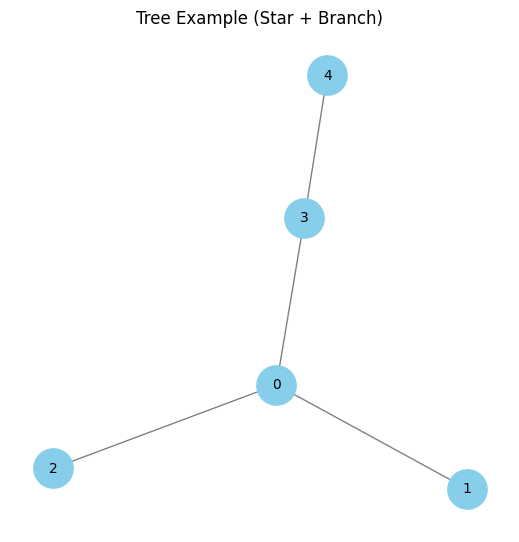

Saved tree_example.pdf


In [17]:
T = nx.Graph()
T.add_nodes_from(range(5))  # 0,1,2,3,4
T.add_edges_from([
    (0,1), (0,2), (0,3), (3,4)
])

# 2. Plot the graph
plt.figure(figsize=(5, 5))
pos = nx.spring_layout(T, seed=42)
nx.draw(
    T, pos, with_labels=True,
    node_color='skyblue', edge_color='gray',
    node_size=800, font_size=10
)
plt.title("Tree Example (Star + Branch)")
plt.tight_layout()
plt.savefig("../images/tree_example.pdf", format="pdf")
plt.show()
plt.close()

print("Saved tree_example.pdf")

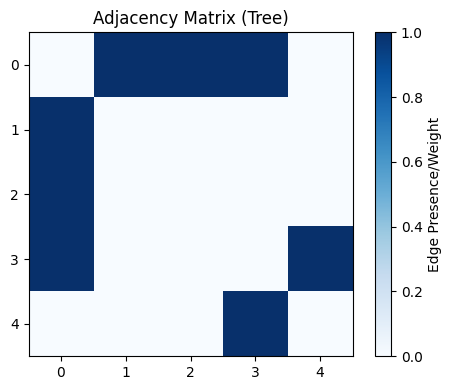

Saved tree_example_adj.pdf


In [18]:
# 3. Adjacency Matrix Visualization
A = nx.to_numpy_array(T)
plt.figure(figsize=(5, 4))
plt.imshow(A, cmap="Blues", interpolation="nearest")
plt.colorbar(label='Edge Presence/Weight')
plt.title("Adjacency Matrix (Tree)")
plt.tight_layout()
plt.savefig("../images/tree_example_adj.pdf", format="pdf")
plt.show()
plt.close()

print("Saved tree_example_adj.pdf")

## ZINC

In [19]:
import torch
from torch_geometric.datasets import ZINC
from torch_geometric.loader import DataLoader

root_dir = '../data/'

train_dataset = ZINC(root=root_dir, subset=True, split='train')
val_dataset   = ZINC(root=root_dir, subset=True, split='val')
test_dataset  = ZINC(root=root_dir, subset=True, split='test')

print(f"Train set size: {len(train_dataset)}")
print(f"Val set size:   {len(val_dataset)}")
print(f"Test set size:  {len(test_dataset)}")

Train set size: 10000
Val set size:   1000
Test set size:  1000


In [20]:
data_example = train_dataset[0]
print(data_example)

# Some typical attributes you might see:
print("Number of nodes (atoms):", data_example.num_nodes)
print("Number of edges:", data_example.num_edges)
print("Edge index shape:", data_example.edge_index.shape)
print("Node feature shape:", data_example.x.shape)
print("Target (penalized logP):", data_example.y)

Data(x=[29, 1], edge_index=[2, 64], edge_attr=[64], y=[1])
Number of nodes (atoms): 29
Number of edges: 64
Edge index shape: torch.Size([2, 64])
Node feature shape: torch.Size([29, 1])
Target (penalized logP): tensor([0.8350])


In [21]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader  = DataLoader(test_dataset, batch_size=32, shuffle=False)

batch = next(iter(train_loader))
print("Batch size (num_graphs):", batch.num_graphs)
print("Combined node feature shape:", batch.x.shape)
print("Combined edge index shape:", batch.edge_index.shape)
print("y shape:", batch.y.shape)


Batch size (num_graphs): 32
Combined node feature shape: torch.Size([777, 1])
Combined edge index shape: torch.Size([2, 1676])
y shape: torch.Size([32])


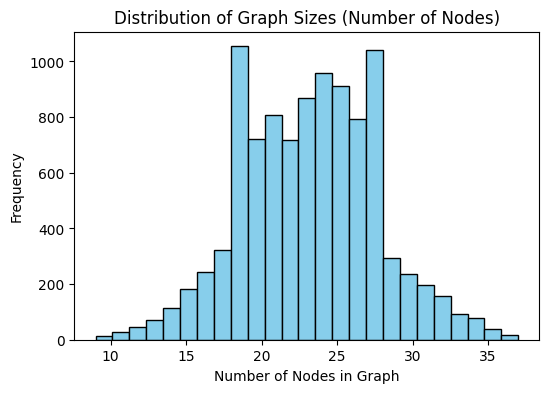

In [64]:
num_nodes_list = []
targets_list   = []

# We'll just sample 1000 graphs from the train set for speed
sample_size = len(train_dataset)

for i in range(sample_size):
    d = train_dataset[i]
    num_nodes_list.append(d.num_nodes)
    targets_list.append(d.y.item())

# Plot histogram of number of nodes
plt.figure(figsize=(6, 4))
plt.hist(num_nodes_list, bins=25, color='skyblue', edgecolor='black')
plt.xlabel("Number of Nodes in Graph")
plt.ylabel("Frequency")
plt.title("Distribution of Graph Sizes (Number of Nodes)")
plt.savefig("../images/graph_sizes_histogram_nodes.pdf", format="pdf")
plt.show()


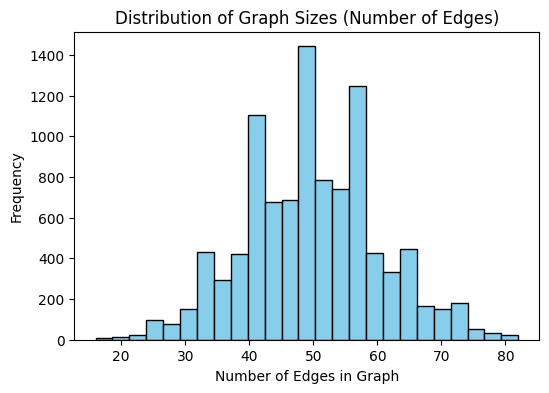

In [65]:
num_nodes_list = []
targets_list   = []

# We'll just sample 1000 graphs from the train set for speed
sample_size = len(train_dataset)

for i in range(sample_size):
    d = train_dataset[i]
    num_nodes_list.append(d.num_edges)
    targets_list.append(d.y.item())

# Plot histogram of number of nodes
plt.figure(figsize=(6, 4))
plt.hist(num_nodes_list, bins=25, color='skyblue', edgecolor='black')
plt.xlabel("Number of Edges in Graph")
plt.ylabel("Frequency")
plt.title("Distribution of Graph Sizes (Number of Edges)")
plt.savefig("../images/graph_sizes_histogram_edges.pdf", format="pdf")
plt.show()


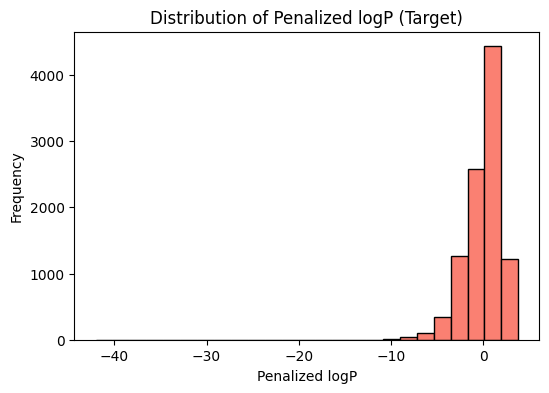

In [63]:
# Plot histogram of penalized logP
plt.figure(figsize=(6, 4))
plt.hist(targets_list, bins=25, color='salmon', edgecolor='black')
plt.xlabel("Penalized logP")
plt.ylabel("Frequency")
plt.title("Distribution of Penalized logP (Target)")
plt.savefig("../images/penalized_logP_histogram.pdf", format="pdf")
plt.show()

In [24]:
print(f"Min number of nodes in sample: {min(num_nodes_list)}")
print(f"Max number of nodes in sample: {max(num_nodes_list)}")

print(f"Min penalized logP: {min(targets_list):.2f}")
print(f"Max penalized logP: {max(targets_list):.2f}")


Min number of nodes in sample: 11
Max number of nodes in sample: 36
Min penalized logP: -15.54
Max penalized logP: 3.47


Data(x=[18, 1], edge_index=[2, 34], edge_attr=[34], y=[1])


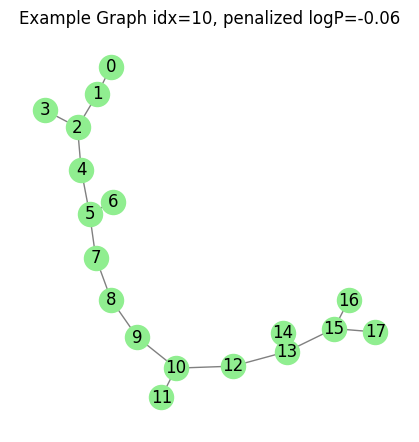

In [25]:
example_data = train_dataset[25]  # pick a different sample
print(example_data)

# Convert to NetworkX
G_nx = nx.Graph()
G_nx.add_nodes_from(range(example_data.num_nodes))
edge_index_np = example_data.edge_index.numpy()

# Add edges
for col in range(edge_index_np.shape[1]):
    src = edge_index_np[0, col]
    dst = edge_index_np[1, col]
    G_nx.add_edge(src, dst)

# Basic draw
plt.figure(figsize=(4, 4))
pos = nx.spring_layout(G_nx, seed=42)
nx.draw(G_nx, pos, with_labels=True, node_color='lightgreen', edge_color='gray')
plt.title(f"Example Graph idx=10, penalized logP={example_data.y.item():.2f}")
plt.show()

In [26]:
if hasattr(example_data, 'edge_attr') and example_data.edge_attr is not None:
    print("Edge attribute shape:", example_data.edge_attr.shape)
    # Print first few bond features if any
    print("First few edge features:\n", example_data.edge_attr[:5])

Edge attribute shape: torch.Size([34])
First few edge features:
 tensor([1, 1, 1, 1, 1])


## Imports & Data Setup

In [27]:
import torch 
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from torch_geometric.datasets import ZINC
from torch_geometric.loader import DataLoader
from torch_geometric.nn import GCNConv, global_mean_pool

import numpy as np 
import matplotlib.pyplot as plt 

root_dir = '../data/'
train_dataset = ZINC(root=root_dir, subset=True, split='train')
val_dataset  = ZINC(root=root_dir, subset=True, split='val')
test_dataset = ZINC(root=root_dir, subset=True, split='test')

print(F"Train set size: {len(train_dataset)}")
print(F"Val set size: {len(val_dataset)}") 
print(F"Test set size: {len(test_dataset)}")

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

Train set size: 10000
Val set size: 1000
Test set size: 1000


## Defining a Simple GNN Model 

In [28]:
train_dataset.num_features

1

In [29]:
class GCNModel(nn.Module):
    def __init__(slef, hidden_dim=64):
        super().__init__()
        input_dim = train_dataset.num_features
        

In [30]:
train_dataset.num_node_features

1

In [31]:
from torch_geometric.datasets import Planetoid
from torch_geometric.transforms import NormalizeFeatures

dataset = Planetoid(root='data/Planetoid', name='Cora', transform=NormalizeFeatures())

print(f'Dataset: {dataset}:')
print('======================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

data = dataset[0]  # Get the first graph object.
print(data)

Dataset: Cora():
Number of graphs: 1
Number of features: 1433
Number of classes: 7
Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])


In [32]:
from torch_geometric.nn import GCNConv
import torch.nn.functional as F

class GCN(torch.nn.Module):
    def __init__(self, hidden_channels):
        super().__init__()
        torch.manual_seed(1234567)
        self.conv1 = GCNConv(dataset.num_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, dataset.num_classes)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = x.relu()
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.conv2(x, edge_index)
        return x

model = GCN(hidden_channels=16)
print(model)

GCN(
  (conv1): GCNConv(1433, 16)
  (conv2): GCNConv(16, 7)
)


In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

def visualize(h, color):
    z = TSNE(n_components=2).fit_transform(h.detach().cpu().numpy())

    plt.figure(figsize=(10,10))
    plt.xticks([])
    plt.yticks([])

    plt.scatter(z[:, 0], z[:, 1], s=70, c=color, cmap="Set2")
    plt.show()

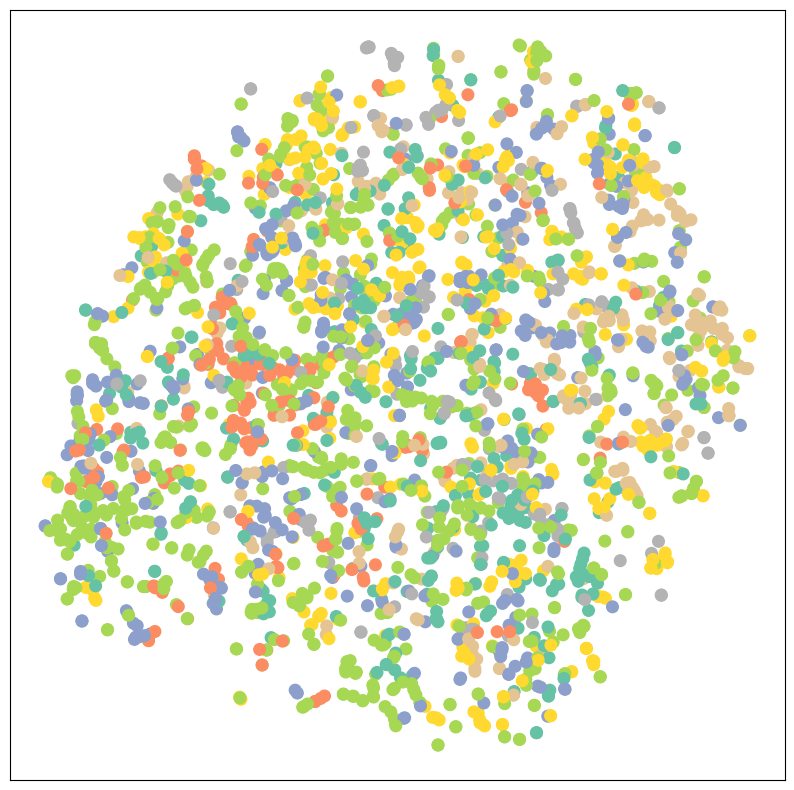

In [34]:
model.eval()

out = model(data.x, data.edge_index)
visualize(out, color=data.y)

In [35]:
model = GCN(hidden_channels=16)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
criterion = torch.nn.CrossEntropyLoss()

def train():
      model.train()
      optimizer.zero_grad()
      out = model(data.x, data.edge_index)
      loss = criterion(out[data.train_mask], data.y[data.train_mask])
      loss.backward()
      optimizer.step()
      return loss

def test():
      model.eval()
      out = model(data.x, data.edge_index)
      pred = out.argmax(dim=1)
      test_correct = pred[data.test_mask] == data.y[data.test_mask]
      test_acc = int(test_correct.sum()) / int(data.test_mask.sum())
      return test_acc


for epoch in range(1, 101):
    loss = train()
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')

Epoch: 001, Loss: 1.9465
Epoch: 002, Loss: 1.9419
Epoch: 003, Loss: 1.9363
Epoch: 004, Loss: 1.9290
Epoch: 005, Loss: 1.9199
Epoch: 006, Loss: 1.9140
Epoch: 007, Loss: 1.9079
Epoch: 008, Loss: 1.8992
Epoch: 009, Loss: 1.8876
Epoch: 010, Loss: 1.8764
Epoch: 011, Loss: 1.8656
Epoch: 012, Loss: 1.8626
Epoch: 013, Loss: 1.8460
Epoch: 014, Loss: 1.8329
Epoch: 015, Loss: 1.8225
Epoch: 016, Loss: 1.8167
Epoch: 017, Loss: 1.7995
Epoch: 018, Loss: 1.7878
Epoch: 019, Loss: 1.7716
Epoch: 020, Loss: 1.7568
Epoch: 021, Loss: 1.7563
Epoch: 022, Loss: 1.7342
Epoch: 023, Loss: 1.7092
Epoch: 024, Loss: 1.7015
Epoch: 025, Loss: 1.6671
Epoch: 026, Loss: 1.6757
Epoch: 027, Loss: 1.6609
Epoch: 028, Loss: 1.6355
Epoch: 029, Loss: 1.6339
Epoch: 030, Loss: 1.6102
Epoch: 031, Loss: 1.5964
Epoch: 032, Loss: 1.5721
Epoch: 033, Loss: 1.5570
Epoch: 034, Loss: 1.5445
Epoch: 035, Loss: 1.5093
Epoch: 036, Loss: 1.4889
Epoch: 037, Loss: 1.4776
Epoch: 038, Loss: 1.4704
Epoch: 039, Loss: 1.4263
Epoch: 040, Loss: 1.3972


In [36]:
test_acc = test()
print(f'Test Accuracy: {test_acc:.4f}')

Test Accuracy: 0.8110


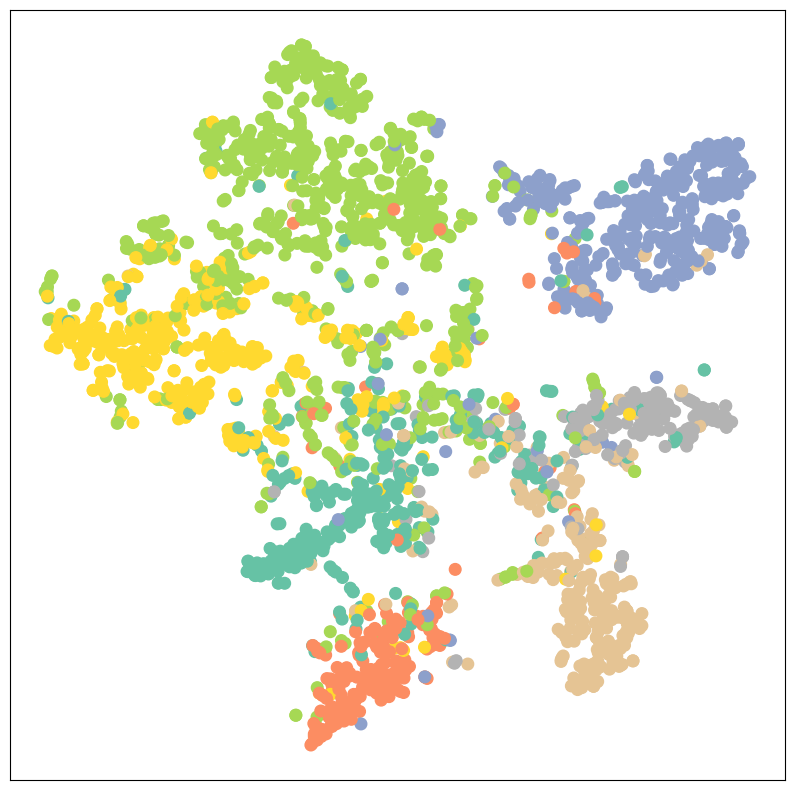

In [37]:
model.eval()
out = model(data.x, data.edge_index)
visualize(out, color=data.y)

In [38]:
from torch_geometric.nn import GATConv

class GAT(torch.nn.Module):
    def __init__(self, hidden_channels, heads):
        super().__init__()
        torch.manual_seed(1234567)
        self.conv1 = GATConv(dataset.num_features, hidden_channels,heads)
        self.conv2 = GATConv(heads*hidden_channels, dataset.num_classes,heads)

    def forward(self, x, edge_index):
        x = F.dropout(x, p=0.6, training=self.training)
        x = self.conv1(x, edge_index)
        x = F.elu(x)
        x = F.dropout(x, p=0.6, training=self.training)
        x = self.conv2(x, edge_index)
        return x

model = GAT(hidden_channels=8, heads=8)
print(model)

optimizer = torch.optim.Adam(model.parameters(), lr=0.005, weight_decay=5e-4)
criterion = torch.nn.CrossEntropyLoss()

def train():
      model.train()
      optimizer.zero_grad()
      out = model(data.x, data.edge_index)
      loss = criterion(out[data.train_mask], data.y[data.train_mask])
      loss.backward()
      optimizer.step()
      return loss

def test(mask):
      model.eval()
      out = model(data.x, data.edge_index)
      pred = out.argmax(dim=1)
      correct = pred[mask] == data.y[mask]
      acc = int(correct.sum()) / int(mask.sum())
      return acc

val_acc_all = []
test_acc_all = []

for epoch in range(1, 101):
    loss = train()
    val_acc = test(data.val_mask)
    test_acc = test(data.test_mask)
    val_acc_all.append(val_acc)
    test_acc_all.append(test_acc)
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}, Val: {val_acc:.4f}, Test: {test_acc:.4f}')

GAT(
  (conv1): GATConv(1433, 8, heads=8)
  (conv2): GATConv(64, 7, heads=8)
)
Epoch: 001, Loss: 4.0245, Val: 0.1700, Test: 0.2040
Epoch: 002, Loss: 3.9922, Val: 0.2800, Test: 0.3010
Epoch: 003, Loss: 3.9547, Val: 0.3480, Test: 0.3720
Epoch: 004, Loss: 3.9151, Val: 0.3960, Test: 0.4480
Epoch: 005, Loss: 3.8637, Val: 0.4300, Test: 0.4750
Epoch: 006, Loss: 3.8053, Val: 0.4280, Test: 0.4850
Epoch: 007, Loss: 3.7579, Val: 0.4300, Test: 0.4770
Epoch: 008, Loss: 3.6782, Val: 0.4260, Test: 0.4620
Epoch: 009, Loss: 3.5984, Val: 0.4220, Test: 0.4410
Epoch: 010, Loss: 3.5145, Val: 0.4120, Test: 0.4250
Epoch: 011, Loss: 3.4376, Val: 0.3980, Test: 0.4030
Epoch: 012, Loss: 3.3417, Val: 0.3680, Test: 0.3890
Epoch: 013, Loss: 3.2471, Val: 0.3480, Test: 0.3700
Epoch: 014, Loss: 3.1213, Val: 0.3340, Test: 0.3580
Epoch: 015, Loss: 3.0203, Val: 0.3260, Test: 0.3410
Epoch: 016, Loss: 2.9081, Val: 0.3120, Test: 0.3220
Epoch: 017, Loss: 2.7991, Val: 0.2900, Test: 0.3040
Epoch: 018, Loss: 2.6981, Val: 0.2680

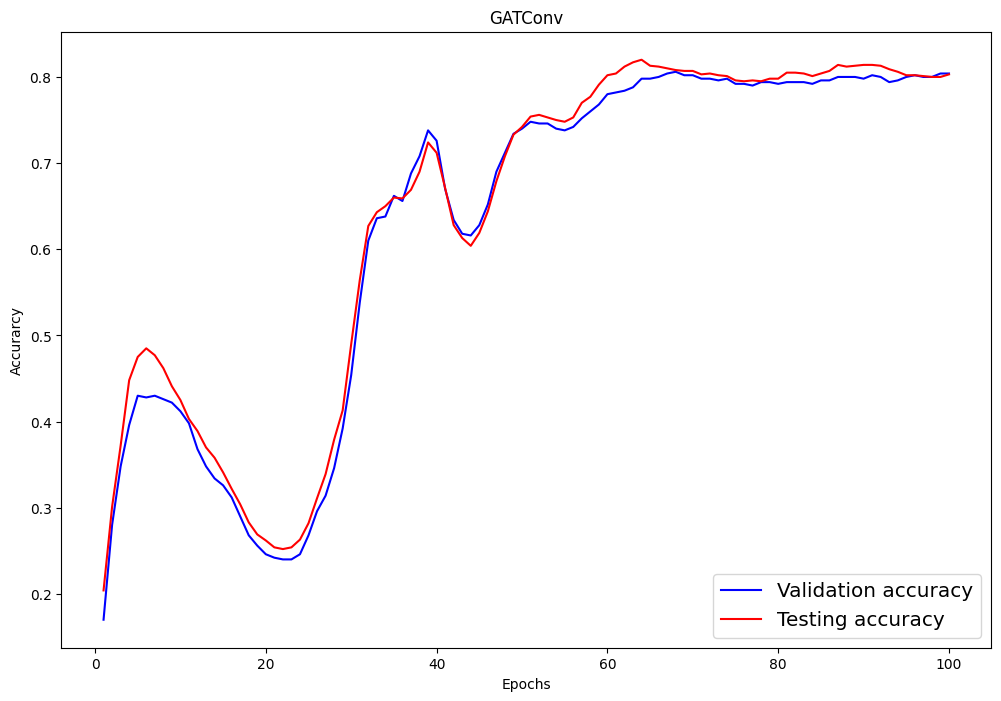

In [39]:
import numpy as np

plt.figure(figsize=(12,8))
plt.plot(np.arange(1, len(val_acc_all) + 1), val_acc_all, label='Validation accuracy', c='blue')
plt.plot(np.arange(1, len(test_acc_all) + 1), test_acc_all, label='Testing accuracy', c='red')
plt.xlabel('Epochs')
plt.ylabel('Accurarcy')
plt.title('GATConv')
plt.legend(loc='lower right', fontsize='x-large')
plt.savefig('gat_loss.png')
plt.show()

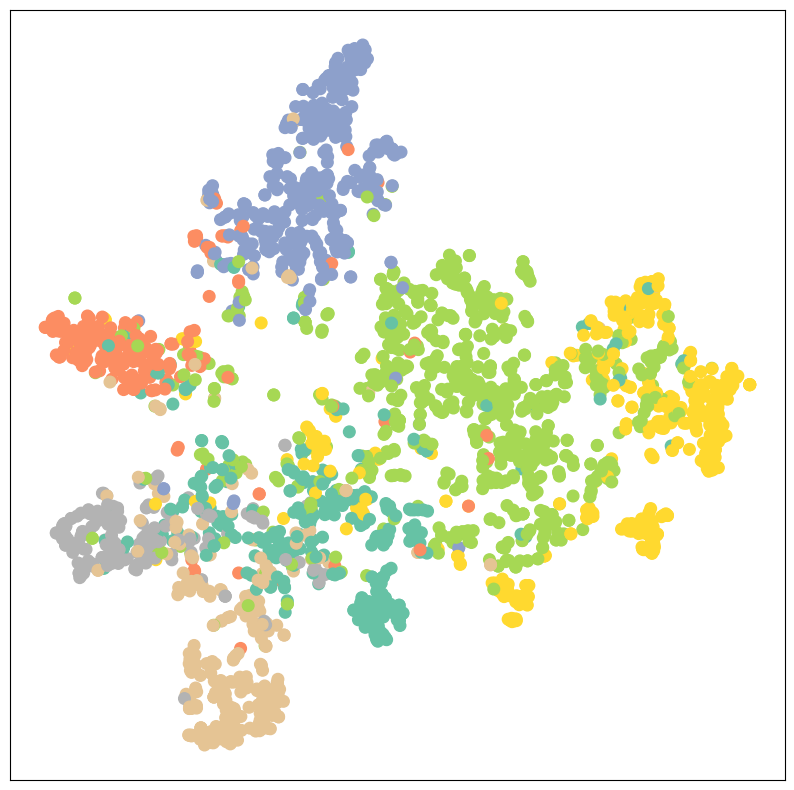

In [40]:
model.eval()

out = model(data.x, data.edge_index)
visualize(out, color=data.y)

In [49]:
import os
import torch
save_dir = "../data/experiments"

loaded_model = torch.load(os.path.join(save_dir, "gcn_v1_model_full.pt"))
loaded_info  = torch.load(os.path.join(save_dir, "gcn_v1_info.pt"))


/var/folders/p5/dn4spxsx2897rzdgf07vym2c0000gn/T/ipykernel_60927/3477300277.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model = torch.load(os.path.join(save_d

In [50]:
loaded_model

OrderedDict([('conv1.bias',
              tensor([ 0.0000e+00,  0.0000e+00, -6.8325e-01, -1.1865e-01,  0.0000e+00,
                      -1.5200e-02,  0.0000e+00, -2.8598e-02,  1.7539e+00,  0.0000e+00,
                      -3.7038e-03,  0.0000e+00,  0.0000e+00,  0.0000e+00, -1.0425e+00,
                       0.0000e+00, -1.7970e-02, -1.6236e-02, -3.3764e-01, -4.9437e-03,
                       1.2160e-03,  5.4510e-01,  0.0000e+00, -5.5801e-03, -2.3528e-02,
                       0.0000e+00,  0.0000e+00,  1.0204e+00,  0.0000e+00,  0.0000e+00,
                      -5.3927e-02,  9.7124e-01,  1.8578e+00,  0.0000e+00, -1.6427e-01,
                      -2.4013e-02,  8.9032e-01, -1.2873e+00, -3.7564e-03, -3.9784e-03,
                       0.0000e+00,  0.0000e+00, -1.1830e-02,  0.0000e+00,  0.0000e+00,
                       0.0000e+00,  0.0000e+00,  1.4512e+00,  0.0000e+00,  1.2149e+00,
                       0.0000e+00, -2.6748e-01, -2.9604e-02,  0.0000e+00,  0.0000e+00,
               